d:\dev\pipelines\data\segmentate_5s.dill


  0%|          | 0/316 [00:00<?, ?it/s]

('Treppenlaufen', 'Weiping_Zhang', '91231c7f9ce84b41ad46b9ca017df5ff')
14
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (52,) (51, 52)


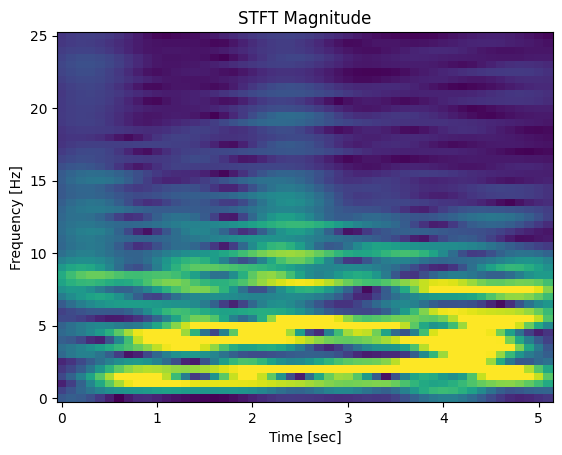

 79%|███████▉  | 250/316 [00:00<00:00, 1222.67it/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dill import load, dump
from scipy.signal import stft

from tqdm import tqdm
# get absolute path of "data/segmentate_5s.dill"
import os 
path = os.path.abspath("../data/segmentate_5s.dill")
print(path)

# read data/segmentate_5s.dill
i = 0
with open("../data/segmentate_5s.dill", "rb") as fr:
    for key, segments in tqdm(load(fr).items()):
        if i != 250:
            i += 1
            continue
        print(key)
        print(len(segments))
        print(segments[0].shape)
        print(segments[0].columns)
        # print only numeric columns
        print(segments[0].select_dtypes(include=np.number).columns)
        #print(segments[0].iloc[:, 0])
        # apply stft
        f, t, Zxx = stft(segments[0].iloc[:, 0], fs=50, noverlap=95, nperseg=100)
        print(f.shape, t.shape, Zxx.shape)
        # create spectrogram
        plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1)
        # log scale
        plt.title('STFT Magnitude')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()
        break
        i += 1
        # break
        if i > 5:
            break

In [10]:
# for each segment, apply stft and create spectrogram
spectograms = {}
with open("../data/segmentate_5s.dill", "rb") as fr:
    for key, segments in tqdm(load(fr).items()):
        fft_segments = []
        for segment in segments:
            spectogram = []
            # for each numeric column
            for col in segment.select_dtypes(include=np.number).columns:
                f, t, Zxx = stft(segment[col], fs=50, noverlap=95, nperseg=100)
                spectogram.append(np.abs(Zxx))
            fft_segments.append(np.array(spectogram))
            #print(np.array(spectogram).shape)
        spectograms[key] = fft_segments

# save spectograms
with open("../data/spectograms.dill", "wb") as fw:
    dump(spectograms, fw)

100%|██████████| 316/316 [00:22<00:00, 14.02it/s]


In [12]:
import torch
# check if cuda is available
print(torch.cuda.is_available())
torch.__version__

False


'2.0.0+cpu'